In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#reading csv file
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
#Show_id: Unique ID for every Movie / Tv Show
#Type: Identifier - A Movie or TV Show
#Title: Title of the Movie / Tv Show
#Director: Director of the Movie
#Cast: Actors involved in the movie/show
#Country: Country where the movie/show was produced
#Date_added: Date it was added on Netflix
#Release_year: Actual Release year of the movie/show
#Rating: TV Rating of the movie/show
#Duration: Total Duration - in minutes or number of seasons
#Listed_in: Genre
#Description: The summary description

In [27]:
#Shape of the columns
df.shape

(8807, 12)

In [28]:
# finding all columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [29]:
#giving the columns a suitable name
df.rename(columns={"listed_in":"genres"},inplace = True)

In [30]:
#checking the columns name is given or not
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
#finding the duplicate record
df[df.duplicated()==True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description


In [32]:
null_values_columns_wise=df.isna().sum()
null_values_columns_wise

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genres             0
description        0
dtype: int64

In [33]:
type(null_values_columns_wise)

pandas.core.series.Series

In [34]:
null_values_columns_wise = df.isna().sum().sort_values()
null_values_columns_wise
# we can see null value are present in cast,country and director

show_id            0
type               0
title              0
release_year       0
genres             0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

In [35]:
df.shape[0]

8807

In [36]:
#percentage of null values present column wise
null_values_percentage_column_wise = np.round((null_values_columns_wise / df.shape[0])*100,2)
null_values_percentage_column_wise

show_id          0.00
type             0.00
title            0.00
release_year     0.00
genres           0.00
description      0.00
duration         0.03
rating           0.05
date_added       0.11
cast             9.37
country          9.44
director        29.91
dtype: float64

In [37]:
missing_null_values = pd.concat([null_values_columns_wise,null_values_percentage_column_wise],axis = 1)
missing_null_values

,0,1
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00
genres,0,0.00
description,0,0.00
duration,3,0.03
rating,4,0.05
date_added,10,0.11
cast,825,9.37


In [38]:
missing_null_values = missing_null_values.rename(columns = {0:"null_value_missing",1:"Percentage_null_values_missing"})
missing_null_values

,null_value_missing,Percentage_null_values_missing
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00
genres,0,0.00
description,0,0.00
duration,3,0.03
rating,4,0.05
date_added,10,0.11
cast,825,9.37


In [39]:
#by this table we can see that 0.03% null values are present in duration
#0.05% null values are present in rating
#0.11% null_values are present in date_added
#9.37% null value are present in cast
#9.44% null values are present in country
#29.91% null values are present in director

In [40]:
df["country"].nunique()
#There are 748 unique countries

748

In [41]:
df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [42]:
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])
df["country"]

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [43]:
df['rating'] = df['rating'].fillna(method='bfill')
df["rating"]

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [44]:
df.nunique()['show_id']

8807

In [45]:
df.nunique()['show_id']-df.nunique()['description']
# There are 32 movies which has same description

32

In [46]:
# Lets find the movies which has same description and is repeated
repeated_movies = df[df['description'].duplicated()==True]
repeated_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",United States,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
237,s238,Movie,Boomika (Hindi),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",United States,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
238,s239,Movie,Boomika (Malayalam),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",United States,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
239,s240,Movie,Boomika (Telugu),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",United States,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
851,s852,Movie,99 Songs (Tamil),NaN,NaN,United States,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
852,s853,Movie,99 Songs (Telugu),NaN,NaN,United States,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
1653,s1654,Movie,Andhakaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",India,"November 24, 2020",2020,TV-14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."
1986,s1987,Movie,Nee Enge En Anbe,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",United States,"September 17, 2020",2014,TV-14,137 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...
2335,s2336,Movie,Seven (Telugu),NaN,NaN,United States,"June 26, 2020",2019,TV-14,116 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...
2873,s2874,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,"February 27, 2020",2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...


In [47]:
# Let's explore the 'type' column
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [48]:
# So there are only 2 types of contents that are streaming in the Netflix according to the data. Let's find the count
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [49]:
# Let's explore the 'rating' column
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [50]:
df.columns[df.isnull().any()]

Index(['director', 'cast', 'date_added', 'duration'], dtype='object')

In [51]:
df[df["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [52]:
df.loc[5541,'duration']=df.loc[5541,'rating']
df.loc[5794,'duration']=df.loc[5794,'rating']
df.loc[5813,'duration']=df.loc[5813,'rating']

In [53]:
# To check if NaN values still exists in 'duration' column
df['duration'].isnull().sum()

0

In [54]:
total_null = df.isnull().sum()
total_null

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           0
genres             0
description        0
dtype: int64

In [55]:
# By using some imputations replace the incorrect rating values mentioned as duration by  the mode values of rating 

df.loc[5541,'rating']=df['rating'].mode()[0]
df.loc[5794,'rating']=df['rating'].mode()[0]
df.loc[5813,'rating']=df['rating'].mode()[0]

In [56]:
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


In [57]:
# Lets have a look into the release_year column
df['release_year'].isnull().sum()

0

In [58]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [59]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  genres        8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [61]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [62]:
# We can clearly observe that the the column 'date_added' has the datatype as 'object', we need to convert it into 
# datetime datatype

In [63]:
df["date_added"]=pd.to_datetime(df["date_added"])
df["date_added"].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  genres        8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [65]:
# Add some more columns to the dataset to extract more information from the dataset

In [66]:
date = df.copy()
date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [67]:
date.shape

(8807, 12)

In [68]:
# Before analysing the date_added columnjust count the missing values

In [69]:
date["date_added"].isnull().sum()

10

In [70]:
# we can clearly observe  that there are total 10 missing values in the date_added column.... So drop the missing values records

In [71]:
date = date.dropna(subset = ["date_added"])

In [72]:
date["date_added"].isnull().sum()

0

In [73]:
#Now we can see that all the null values are drop

In [74]:
date.shape

(8797, 12)

In [76]:
date["year_added"] = date["date_added"].dt.year
date["month_added"] = date["date_added"].dt.month
date["day_added"] = date["date_added"].dt.day

In [77]:
date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  genres        8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int64         
 13  month_added   8797 non-null   int64         
 14  day_added     8797 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

In [78]:
# Analyzing statistics about the data provided

In [79]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [80]:
date['year_added'].value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

In [81]:
# from the above we can observe that maximum number of movies added to the Netflix is in the year 2018-2020

In [82]:
# Netflix has 25% of movies and TV shows that were released within the last two years
# About 75% of Netflix's content consists of movies and TV shows released after 2013
# Data from Netflix shows that new trend movies or TV shows are more prevalent.
# For more subscribers, Netflix should invest in classic Movies and TV shows.

In [83]:
#Univarate analysis

In [84]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [85]:
type_count = df.groupby('type')['type'].count()
type_count

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

In [86]:
# From the above we can see that out of the total count 6131 are Movie and 2676 are TV Show

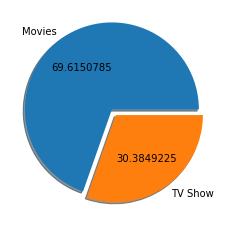

In [87]:
# Pie Chart
plt.pie(type_count,labels=['Movies','TV Show'],autopct = '%f5',shadow=True,explode = (0.08,0))
plt.show()
# Around 70 percent Mevies and 30 percent TV Shows are streaming in the Netflix Platform

In [88]:
date.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24


In [89]:
# Let's see the how many Movie's or TV Shows is been added into Netflix Year wise i.e in last 5 Years

In [90]:
movies_added_netflix_year_wise = date.groupby('year_added')['year_added'].count()
movies_added_netflix_year_wise

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64

In [91]:
x,y = movies_added_netflix_year_wise.index,movies_added_netflix_year_wise

In [92]:
x

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='year_added')

In [93]:
y

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64

Text(0.5, 1.0, 'Shows released Year wise in Netflix')

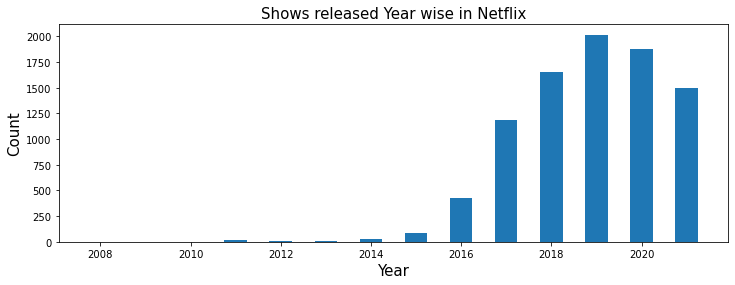

In [94]:
plt.figure(figsize=(12,4))
plt.bar(x,y,width=0.5)
plt.xlabel('Year',size = 15)
plt.ylabel("Count",size = 15)
plt.title("Shows released Year wise in Netflix",size=15)

In [95]:
# We can clearly observe that the Netflix started adding the content from the Year 2014
# We can also observe that the highest number of Movies added in NetFlix in the year 2019

In [96]:
# Using Seaborn

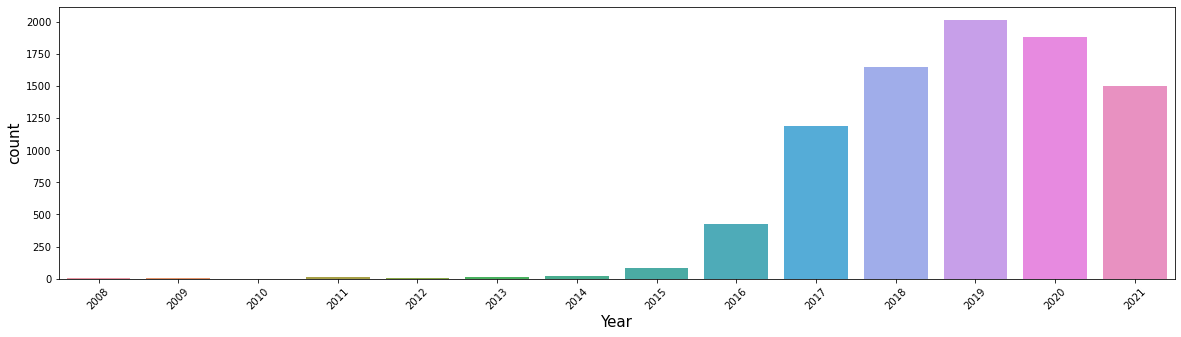

In [97]:
plt.figure(figsize=(20,5))
sns.countplot(data = date,x = date['year_added'])
plt.xticks(rotation = 45)
plt.xlabel('Year',size = 15)
plt.ylabel("count",size = 15)
plt.show()

In [98]:
# From the above figure we can conclude that the maximum amount of movies added to Netflix between 2017-2021

In [99]:
# Lets dig into Monthwise content added

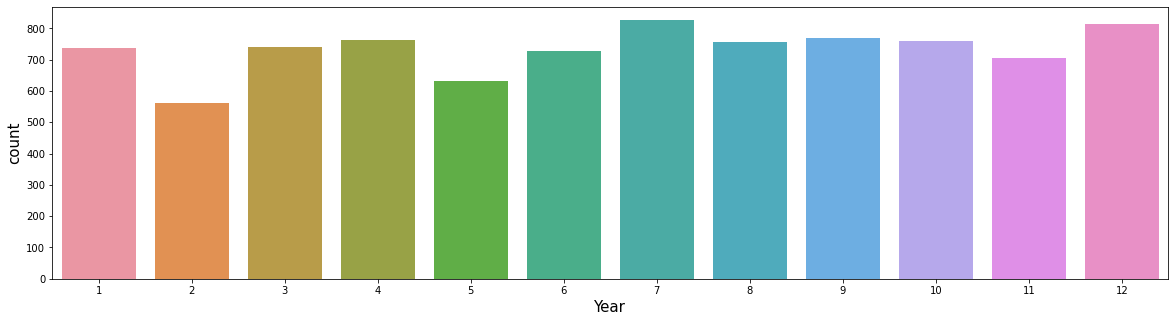

In [100]:
# Content added in Month wise is linear 
plt.figure(figsize=(20,5))
sns.countplot(data = date,x = date['month_added'])
plt.xlabel('Year',size = 15)
plt.ylabel("count",size = 15)
plt.show()

In [101]:
# let's add another column in date dataframe i.e. name of the day

In [102]:
date['day_name'] = date['date_added'].dt.day_name()

In [103]:
date.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,day_added,day_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,Friday


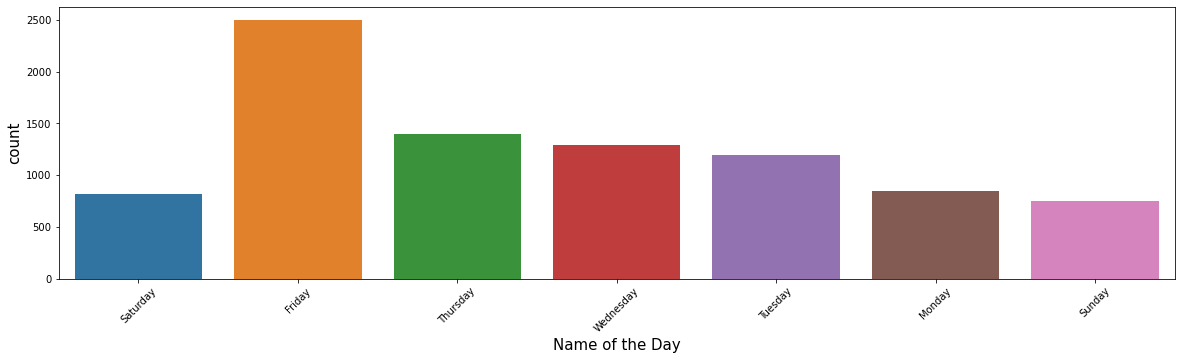

In [104]:
# Content added in day wise 
# Most of the TV Shows and Movies added into NetFilx is on Thrusday and Friday but major Contribution is on friday
plt.figure(figsize=(20,5))
sns.countplot(data = date,x = date['day_name'])
plt.xlabel('Name of the Day',size = 15)
plt.ylabel("count",size = 15)
plt.xticks(rotation = 45)
plt.show()

In [105]:
# To increase the Profits on which day the new content be added ?

In [106]:
count = date['day_added'].value_counts(normalize=True)

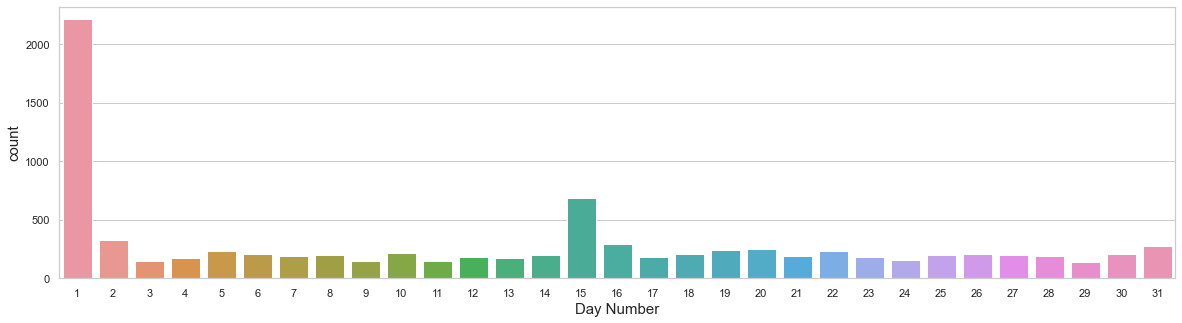

In [107]:
plt.figure(figsize=(20,5))
sns.set(style = 'whitegrid')
sns.countplot(data = date,x = date['day_added'])
plt.xlabel('Day Number',size = 15)
plt.ylabel("count",size = 15)
#plt.xticks(rotation = 45)
plt.show()

In [108]:
# Among all the days  most of the content has been added to the 1st of every month

In [109]:
bins = [1941,2000,2011,2014,2016,2018,2020,2021]
netflix_date_v1 = pd.cut(date['release_year'],bins=bins).value_counts()

In [110]:
bins1 = [1941,2000,2011,2013,2021]
netflix_date_v2 = pd.cut(date['release_year'],bins=bins1).value_counts()

In [111]:
netflix_date_bin = netflix_date_v1.to_frame()
netflix_date_bin.rename(columns = {"release_year":"count"},inplace= True)
netflix_date_bin1 = netflix_date_v2.to_frame()
netflix_date_bin1.rename(columns = {"release_year":"count"},inplace= True)

In [112]:
netflix_date_bin

,count
"(2016, 2018]",2178
"(2018, 2020]",1983
"(2014, 2016]",1459
"(2000, 2011]",1148
"(2011, 2014]",875
"(2020, 2021]",592
"(1941, 2000]",561


In [113]:
netflix_date_bin1

,count
"(2013, 2021]",6564
"(2000, 2011]",1148
"(1941, 2000]",561
"(2011, 2013]",523


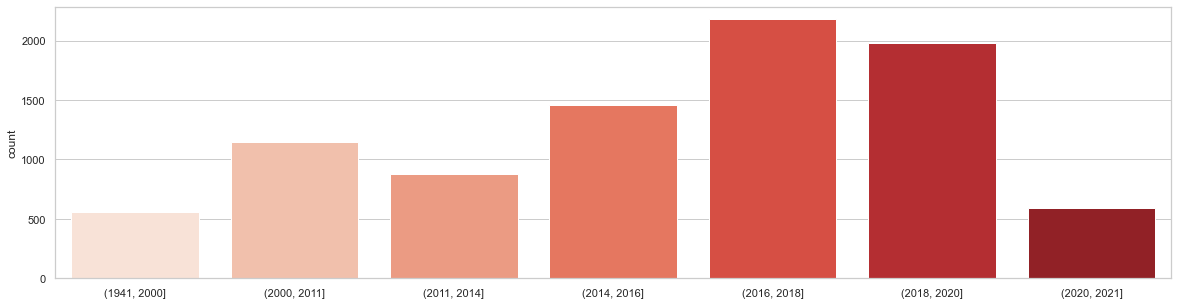

In [114]:
plt.figure(figsize=(20,5))
sns.set(style = 'whitegrid')
sns.barplot(x=netflix_date_bin.index,y='count',data=netflix_date_bin,palette="Reds")
#plt.xlabel('Day Number',size = 15)
#plt.ylabel("count",size = 15)
#plt.xticks(rotation = 45)
plt.show()

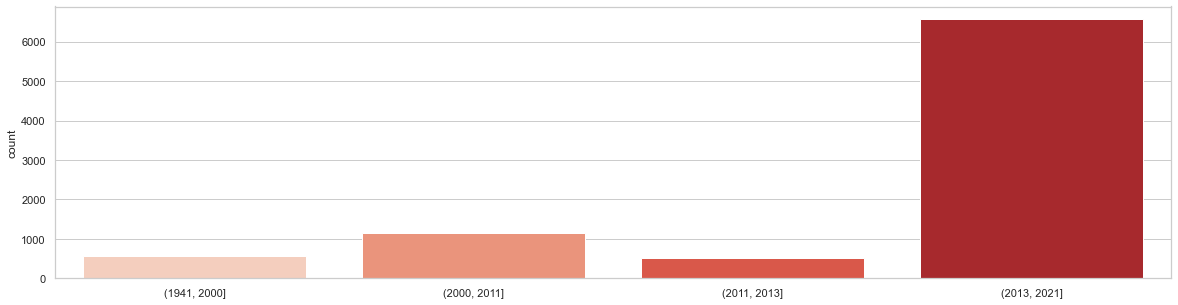

In [115]:
plt.figure(figsize=(20,5))
sns.set(style = 'whitegrid')
sns.barplot(x=netflix_date_bin1.index,y='count',data=netflix_date_bin1,palette="Reds")
#plt.xlabel('Day Number',size = 15)
#plt.ylabel("count",size = 15)
#plt.xticks(rotation = 45)
plt.show()

In [116]:
# Netflix began adding content in 2014 as indicated by the "added_year" analysis mentioned above.
# Added content has a release date ranging from 2014 till now for 75% of movies and TV shows. 
# This shows Netflix encourages content creators to add new content in the platform.
# New content creators have a lot of opportunities to share their content on Netflix.

In [117]:
genres = ", ".join(df['genres']).split(", ")

In [118]:
genres

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'British TV Shows',
 'Crime TV Shows',
 'Docuseries',
 'TV Comedies',
 'TV Dramas',
 'Documentaries',
 'International Movies',
 'Crime TV Shows',
 'Spanish-Language TV Shows',
 'TV Dramas',
 'Thrillers',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'TV Action & Adventure',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'In

In [119]:
type(genres)

list

In [120]:
genre = pd.DataFrame(genres)

In [121]:
genre

,0
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows
...,...
19318,Children & Family Movies
19319,Comedies
19320,Dramas
19321,International Movies


In [122]:
genre.rename(columns={0:'Genre'},inplace=True)

In [123]:
type(genre)

pandas.core.frame.DataFrame

In [124]:
# Top 5 Genres in NetFlix
top_5_genres = genre.value_counts().head()

In [126]:
top_5_genres

Genre                 
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

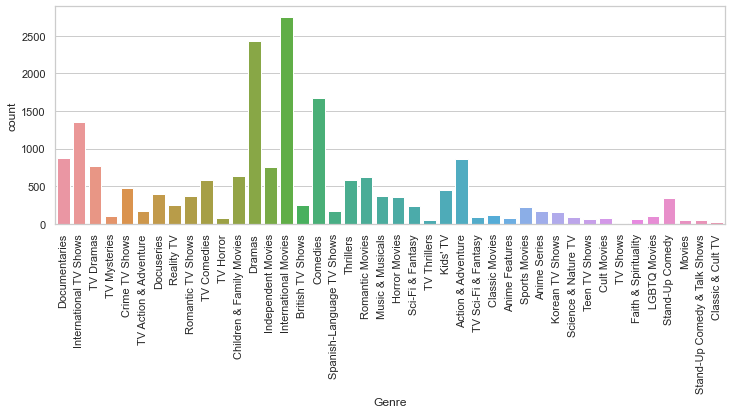

In [127]:
plt.figure(figsize=(12,4))
sns.countplot(data = genre,x=genre['Genre'])
plt.xticks(rotation=90)
plt.show

In [128]:
# Here we can clearly observe that the most popular Genre streamed in Netflix are International Movies and Dramas

In [129]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [130]:
cast_data = df.copy()

In [132]:
cast_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [133]:
cast_data.dropna(subset=['cast'],inplace=True)

In [134]:
cast_data.shape

(7982, 12)

In [135]:
cast_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [136]:
actors = ", ".join(cast_data['cast']).split(", ")

In [137]:
actors

['Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel',
 'Natasha Thahane',
 'Arno Greeff',
 'Xolile Tshabalala',
 'Getmore Sithole',
 'Cindy Mahlangu',
 'Ryle De Morny',
 'Greteli Fincham',
 'Sello Maake Ka-Ncube',
 'Odwa Gwanya',
 'Mekaila Mathys',
 'Sandi Schultz',
 'Duane Williams',
 'Shamilla Miller',
 'Patrick Mofokeng',
 'Sami Bouajila',
 'Tracy Gotoas',
 'Samuel Jouy',
 'Nabiha Akkari',
 'Sofia Lesaffre',
 'Salim Kechiouche',
 'Noureddine Farihi',
 'Geert Van Rampelberg',
 'Bakary Diombera',
 'Mayur More',
 'Jitendra Kumar',
 'Ranjan Raj',
 'Alam Khan',
 'Ahsaas Channa',
 'Revathi Pillai',
 'Urvi Singh',
 'Arun Kumar',
 'Kate Siegel',
 'Zach Gilford',
 'Hamish Linklater',
 'Henry Thomas',
 'Kristin Lehman',
 'Samantha Sloyan',
 'Igby Rigney',
 'Rahul Kohli',
 'Annarah Cymone',
 'Annabeth Gish',
 'Alex Essoe',
 'Rahul Abburi',
 'Matt Biedel',
 'Michael Trucco',
 'Crystal Balint',
 'Louis Oliver',
 'Vanessa Hudgens',
 'Kimiko Glenn',
 'James Marsd

In [138]:
actors_name = pd.DataFrame(actors)

In [139]:
actors_name.head(5)

,0
0,Ama Qamata
1,Khosi Ngema
2,Gail Mabalane
3,Thabang Molaba
4,Dillon Windvogel


In [142]:
actors_name.rename(columns={0:'Actor Names'},inplace=True)

In [143]:
actors_name.head()

,Actor Names
0,Ama Qamata
1,Khosi Ngema
2,Gail Mabalane
3,Thabang Molaba
4,Dillon Windvogel


In [144]:
top_10_actor_names = actors_name.value_counts().head(10)

In [145]:
top_10_actor_names = pd.DataFrame(top_10_actor_names)

In [146]:
top_10_actor_names = top_10_actor_names.reset_index()

In [147]:
top_10_actor_names

,Actor Names,0
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


In [148]:
top_10_actor_names.columns

Index(['Actor Names', 0], dtype='object')

In [149]:
top_10_actor_names['Actor Names']

0         Anupam Kher
1      Shah Rukh Khan
2       Julie Tejwani
3    Naseeruddin Shah
4    Takahiro Sakurai
5        Rupa Bhimani
6        Akshay Kumar
7             Om Puri
8           Yuki Kaji
9    Amitabh Bachchan
Name: Actor Names, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

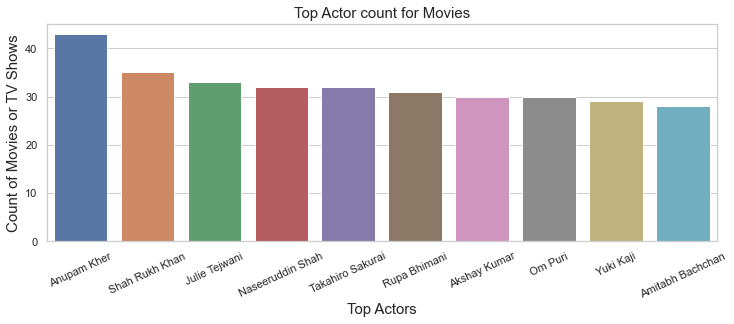

In [150]:
plt.figure(figsize=(12,4))
sns.barplot(data = top_10_actor_names,x=top_10_actor_names['Actor Names'],y=top_10_actor_names[0])
plt.xticks(rotation=25)
plt.xlabel('Top Actors',size=15)
plt.ylabel('Count of Movies or TV Shows',size=15)
plt.title('Top Actor count for Movies', fontsize=15)
plt.show

In [151]:
# Top Actors are Indian Proud to say that !!!!

In [152]:
# Lets explore the duration column of the dataset

In [153]:
# For Movies

In [154]:
movies = df[df['type']=='Movie']

In [155]:
movies.shape

(6131, 12)

In [156]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [157]:
movies['duration'].isna().sum()
# This states that there are no null values present in duration tab for movies

0

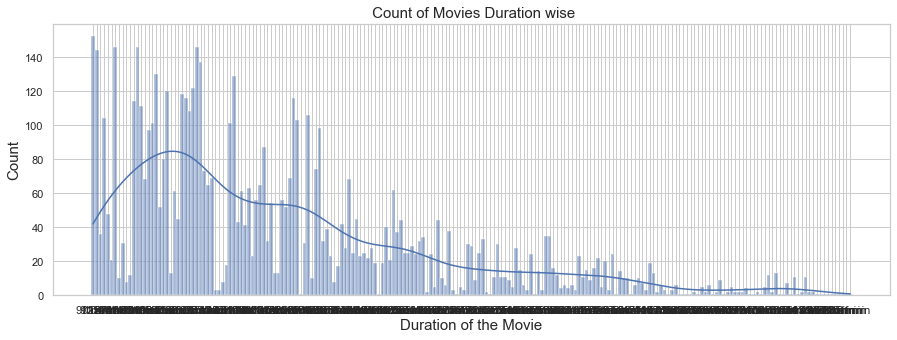

In [159]:
plt.figure(figsize=(15,5))
sns.histplot(data = movies,x = 'duration',kde=True)
plt.xlabel("Duration of the Movie",size=15)
plt.ylabel("Count",size = 15)
plt.title(" Count of Movies Duration wise",size = 15)

plt.show()

In [165]:
# Final Recomendations

In [166]:
# Summary of Final Recommendations
# Approx 20-30% of Netflix's content consists of movies and TV shows released before 2013.

# ###### Recommendations
# 1. For more subscribers, Netflix should invest in definitive Movies and TV shows.
#    Netflix adds nealry half of its content on Thursdays and Fridays. This may be due to the fact that people are likely to watch 
#    more content during weekends.
# 2. For content creators or Netflix, Thursday and Friday are recommended dates to release content.
# 3. It was evident that 1st of every month was when the most content was added. 
# 4. It highly recommend that Movies be added at the beginning of every month.
# 5. Netflix began adding content in 2014 as indicated by the "added_year" analysis mentioned above. Added content has a 
#    release date ranging from 2014 till now for 75% of movies and TV shows. This shows Netflix encourages content creators to add new content in the platform. ###### Recommendations -
# 6. New content creators have a lot of opportunities to share their content on Netflix.